# Heat Conduction Analysis

## Simple heat conduction (1D, steady state)

This notebook visualizes the results from the 1D steady-state heat conduction solver implemented in `0-conduction-simple.c` and similar codes.

The solver addresses the equation:
$$\frac{d^2 T}{dx^2} = 0$$

With boundary conditions:
- T(0) = 0
- T(1) = 1

The analytical solution is the linear profile T(x) = x, which we'll compare with our numerical results.

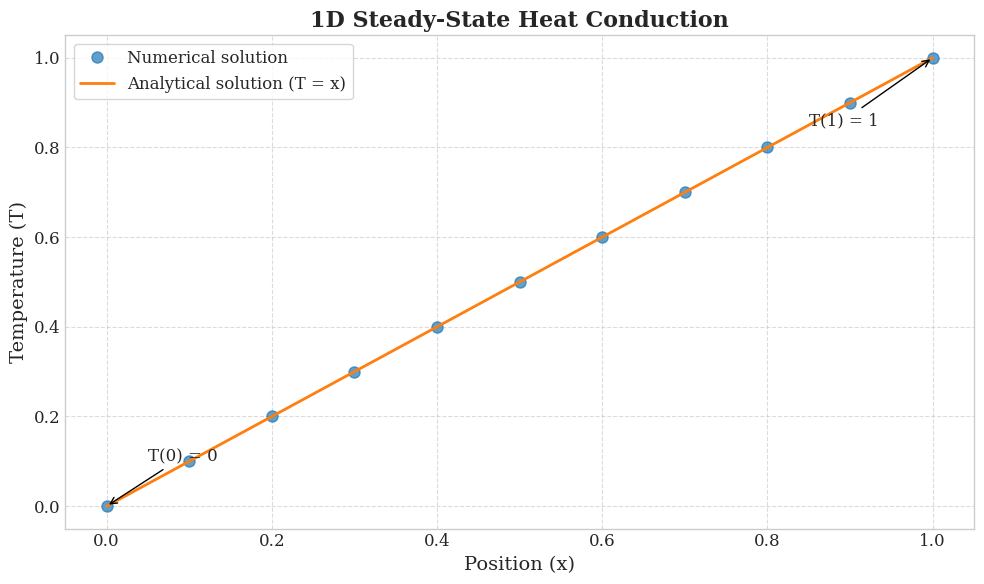

In [1]:
# ## Visualization of Results
# 
# Let's load the numerical results from our simulation and create a visualization comparing with the analytical solution.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set up nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (10, 6)

# Load the simulation results
data = pd.read_csv('../testCases/conduction-simple.csv', header=None, names=['x', 'T'])

# Create the figure
fig, ax = plt.subplots()

# Plot numerical solution
ax.plot(data['x'], data['T'], 'o', color='#1f77b4', markersize=8, 
         label='Numerical solution', alpha=0.7)

# Plot analytical solution (T = x)
x_analytical = np.linspace(0, 1, 100)
T_analytical = x_analytical
ax.plot(x_analytical, T_analytical, '-', color='#ff7f0e', linewidth=2, 
         label='Analytical solution (T = x)')

# Add labels and title
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Temperature (T)', fontsize=14)
ax.set_title('1D Steady-State Heat Conduction', fontsize=16, fontweight='bold')

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(frameon=True, fontsize=12)

# Set axis limits
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# Add annotations
ax.annotate('T(0) = 0', xy=(0, 0), xytext=(0.05, 0.1),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('T(1) = 1', xy=(1, 1), xytext=(0.85, 0.85),
            arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()